In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import show
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import imblearn
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.metrics import *
import statsmodels.formula.api as smf
import random
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, datasets, tree
%matplotlib inline

from sklearn.metrics import mean_squared_error
import math

from imblearn.under_sampling import RandomUnderSampler
import imblearn

from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

# Data Preparation

In [2]:
# Load data
sample_df = pd.read_csv("sample_submission.csv", low_memory = False)
train_df = pd.read_csv("train.csv", low_memory = False)
test_df = pd.read_csv("test.csv", low_memory = False)

In [143]:
df.to_csv("insurr_data.csv")

In [144]:
df5 = pd.read_csv("insurr_data.csv", low_memory = False)

In [147]:
df5.head(3)

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [149]:
df6 = df5.drop(['Unnamed: 0'], axis = 1) 
df6.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [3]:
sample_df.shape

(127037, 2)

In [4]:
train_df.shape

(381109, 12)

In [5]:
test_df.shape

(127037, 11)

In [6]:
train_df.columns
# predict variable = Response

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
test_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [8]:
train_df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [9]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [142]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [63]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.091922
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.288917
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Integrate three datasets  (sample_df, train_df and test_df) into one for Explanatory Data Analysis

In [107]:
# Left join sample_df and test_df
df = sample_df.merge(test_df, on='id', how='left')
df.shape

(127037, 12)

In [108]:
# Stack train_df and test_df + sample_df
df = pd.concat([train_df,df])

In [109]:
df.shape

(508146, 12)

In [15]:
df_response = df.loc[df['Response'] == 1]
df_no_response = df.loc[df['Response'] == 0]

# EDA

### Base (Univariate) EDA

In [16]:
# Create a function for countplot
def get_graph(data, xname1, title):

    sns.set(style="darkgrid")
    total = float(len(data)) 
    ax = sns.countplot(x = xname1, data = data)
    ax.set_title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 
    show()

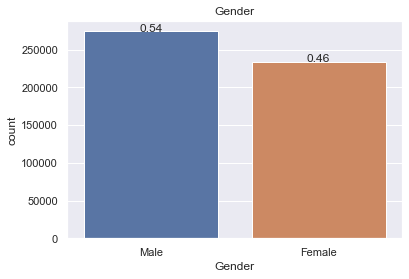

In [17]:
get_graph(df, "Gender", "Gender")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53')

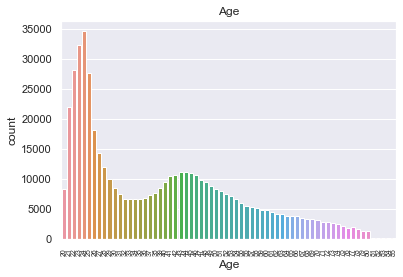

In [18]:
from matplotlib import pyplot as plt
ax = sns.countplot(x = "Age", data = df)
ax.set_title("Age")
plt.xticks(rotation=90)
plt.xticks(size=7)

Text(0.5, 1.0, 'Age')

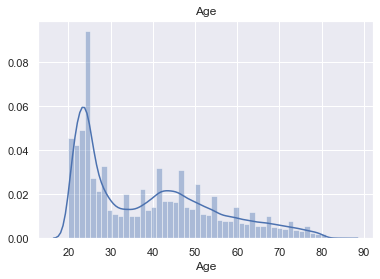

In [19]:
ax = sns.distplot(df["Age"])
ax.set_title("Age")

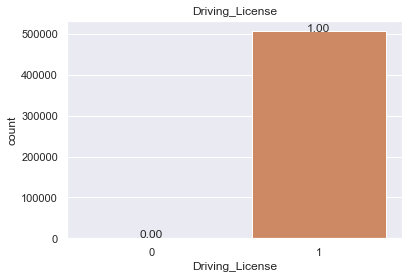

In [20]:
get_graph(df, "Driving_License", "Driving_License")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  Text(32, 0, '32.0'),
  Text(33, 0, '

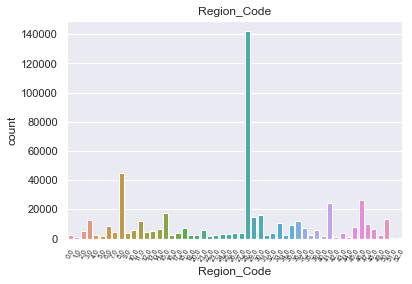

In [21]:
ax = sns.countplot(x = "Region_Code", data = df)
ax.set_title("Region_Code")
plt.xticks(rotation=60)
plt.xticks(size=7)

Text(0.5, 1.0, 'Region_Code')

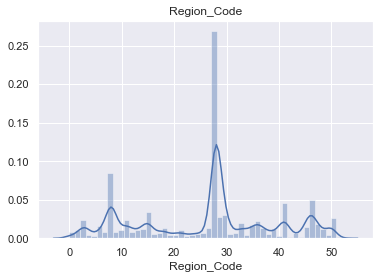

In [22]:
ax = sns.distplot(df["Region_Code"])
ax.set_title("Region_Code")

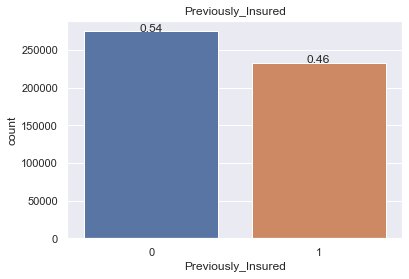

In [23]:
get_graph(df, "Previously_Insured", "Previously_Insured")

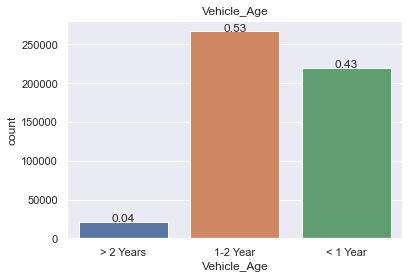

In [24]:
get_graph(df, "Vehicle_Age", "Vehicle_Age")

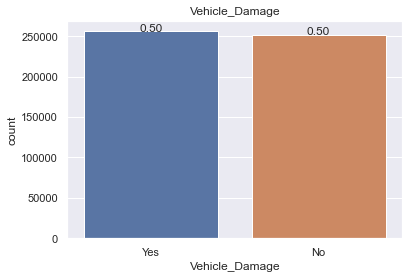

In [25]:
get_graph(df, "Vehicle_Damage", "Vehicle_Damage")

Text(0.5, 1.0, 'Annual_Premium')

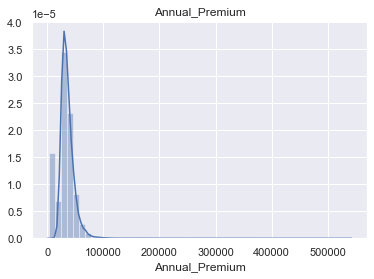

In [26]:
ax = sns.distplot(df["Annual_Premium"])
ax.set_title("Annual_Premium")
# plt.xticks(rotation=90)
# plt.xticks(size=7)

Text(0.5, 1.0, 'Policy_Sales_Channel')

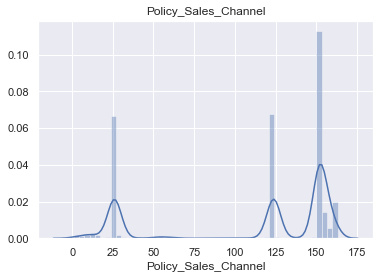

In [27]:

ax = sns.distplot(df["Policy_Sales_Channel"])
ax.set_title("Policy_Sales_Channel")

Text(0.5, 1.0, 'Policy_Sales_Channel')

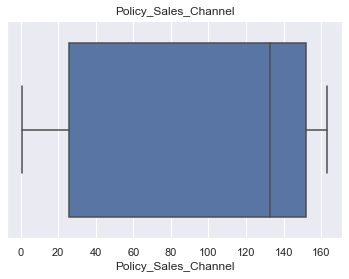

In [28]:
ax = sns.boxplot(df["Policy_Sales_Channel"])
ax.set_title("Policy_Sales_Channel")

Text(0.5, 1.0, 'Vintage')

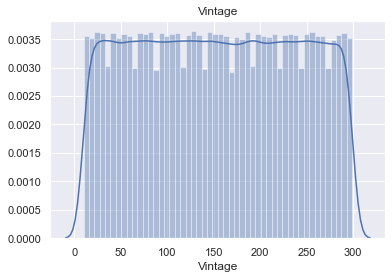

In [29]:

ax = sns.distplot(df["Vintage"])
ax.set_title("Vintage")

Text(0.5, 1.0, 'Vintage')

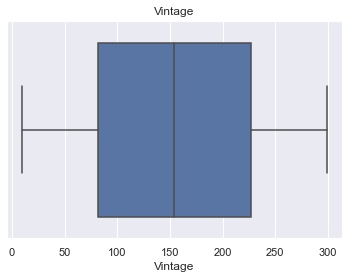

In [30]:
ax = sns.boxplot(df["Vintage"])
ax.set_title("Vintage")

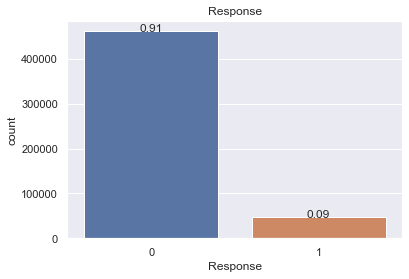

In [31]:
get_graph(df, "Response", "Response")

## Multi-variate EDA

In [32]:
# Create a function for multi-variate countplot
def get_compare_graph_count(data, xname1, hname, title):

    sns.set(style="darkgrid")
    total = float(len(data)) 
    ax = sns.countplot(x = xname1, hue = hname, data = data)
    ax.set_title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+(p.get_width()/2.),
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 
    show()

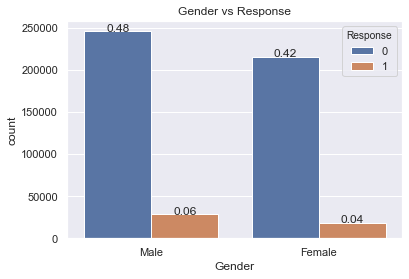

In [33]:
get_compare_graph_count(df, "Gender", "Response", "Gender vs Response")

Text(0.5, 1.0, 'Age vs Response')

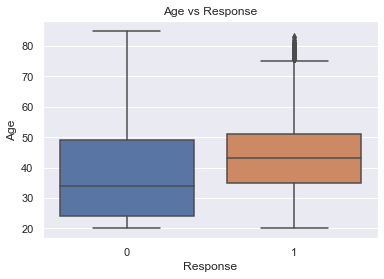

In [34]:
ax = sns.boxplot(x=df["Response"], y = df["Age"])
ax.set_title("Age vs Response")

Text(0.5, 1.0, 'No Response Age')

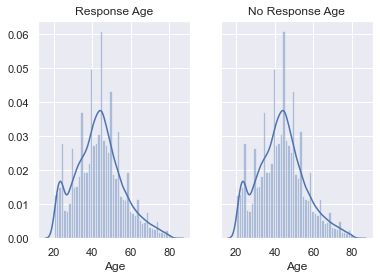

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df_response["Age"],  ax=ax1)
sns.distplot(df_response["Age"],  ax=ax2)
ax1.set_title("Response Age")
ax2.set_title("No Response Age")


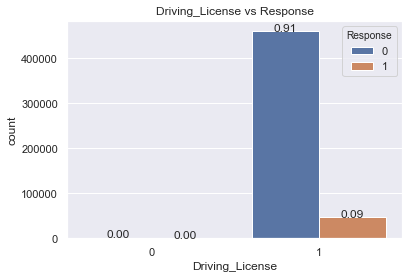

In [36]:
get_compare_graph_count(df, "Driving_License", "Response", "Driving_License vs Response")

Text(0.5, 1.0, 'No Response Region_Code')

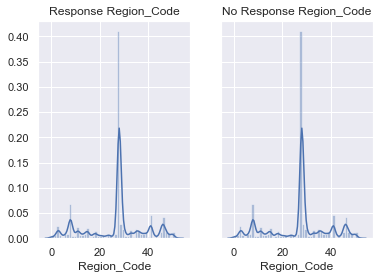

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df_response["Region_Code"],  ax=ax1)
sns.distplot(df_response["Region_Code"],  ax=ax2)
ax1.set_title("Response Region_Code")
ax2.set_title("No Response Region_Code")

Text(0.5, 1.0, 'Annual_Premium vs Response')

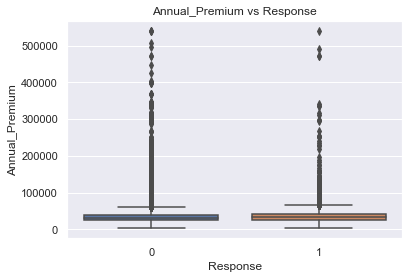

In [38]:
ax = sns.boxplot(x=df["Response"], y = df["Annual_Premium"])
ax.set_title("Annual_Premium vs Response")

Text(0.5, 1.0, 'No Response Annual_Premium')

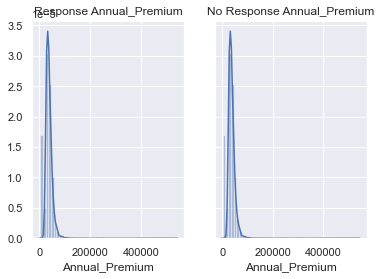

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df_response["Annual_Premium"],  ax=ax1)
sns.distplot(df_response["Annual_Premium"],  ax=ax2)
ax1.set_title("Response Annual_Premium")
ax2.set_title("No Response Annual_Premium")

Text(0.5, 1.0, 'Policy_Sales_Channel vs Response')

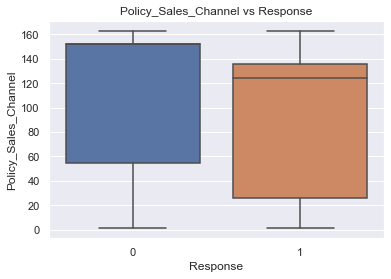

In [40]:
ax = sns.boxplot(x=df["Response"], y = df["Policy_Sales_Channel"])
ax.set_title("Policy_Sales_Channel vs Response")

Text(0.5, 1.0, 'No Response Policy_Sales_Channel')

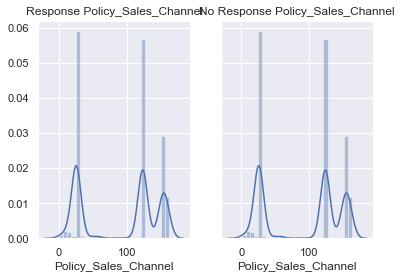

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df_response["Policy_Sales_Channel"],  ax=ax1)
sns.distplot(df_response["Policy_Sales_Channel"],  ax=ax2)
ax1.set_title("Response Policy_Sales_Channel")
ax2.set_title("No Response Policy_Sales_Channel")

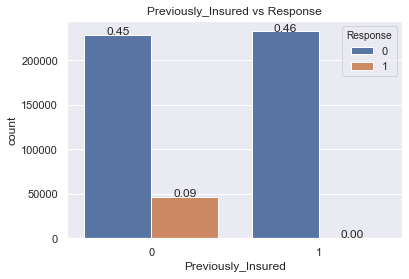

In [42]:
get_compare_graph_count(df, "Previously_Insured", "Response", "Previously_Insured vs Response")

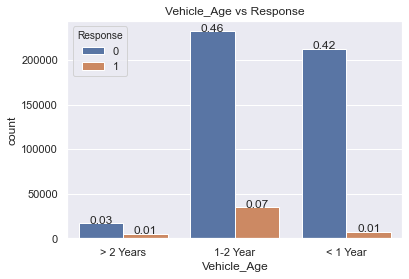

In [43]:
get_compare_graph_count(df, "Vehicle_Age", "Response", "Vehicle_Age vs Response")

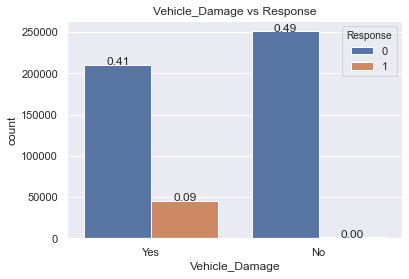

In [44]:
get_compare_graph_count(df, "Vehicle_Damage", "Response", "Vehicle_Damage vs Response")

Text(0.5, 1.0, 'Vintage vs Response')

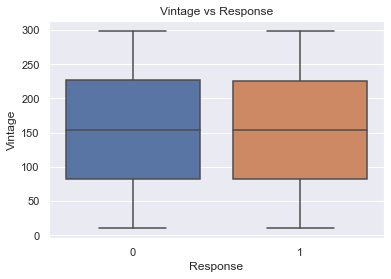

In [45]:
ax = sns.boxplot(x=df["Response"], y = df["Vintage"])
ax.set_title("Vintage vs Response")

Text(0.5, 1.0, 'No Response Vintage')

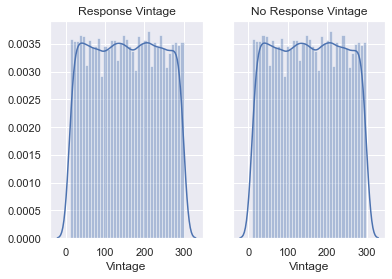

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df_response["Vintage"],  ax=ax1)
sns.distplot(df_response["Vintage"],  ax=ax2)
ax1.set_title("Response Vintage")
ax2.set_title("No Response Vintage")

## correlation test

In [47]:
d = df.corr()

In [106]:
d

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.000643,0.001362,0.001325,0.002557,0.001042,-0.002812,-0.000391,-0.138643
Age,-0.000643,1.000000,-0.079660,0.041649,-0.255582,0.067392,-0.577043,-0.000010,0.094979
Driving_License,0.001362,-0.079660,1.000000,-0.000202,0.014370,-0.012084,0.042862,-0.000850,0.008318
Region_Code,0.001325,0.041649,-0.000202,1.000000,-0.023991,-0.012012,-0.042223,-0.001568,0.008574
Previously_Insured,0.002557,-0.255582,0.014370,-0.023991,1.000000,0.004776,0.221334,0.001664,-0.290704
Annual_Premium,0.001042,0.067392,-0.012084,-0.012012,0.004776,1.000000,-0.114035,-0.000855,0.019477
Policy_Sales_Channel,-0.002812,-0.577043,0.042862,-0.042223,0.221334,-0.114035,1.000000,-0.000814,-0.117930
Vintage,-0.000391,-0.000010,-0.000850,-0.001568,0.001664,-0.000855,-0.000814,1.000000,-0.000867
Response,-0.138643,0.094979,0.008318,0.008574,-0.290704,0.019477,-0.117930,-0.000867,1.000000


<AxesSubplot:>

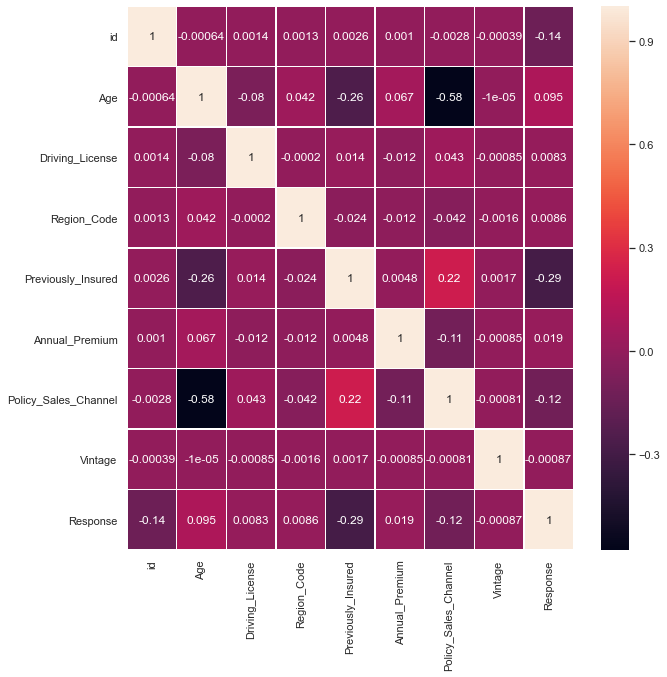

In [141]:
corrMatrix = df.corr()
# print(corrMatrix)

plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix,annot=True,  linewidths=.5)

 Response - previously_insured: -0.341170	
 
 Policy_Sales_Channel - Age: -0.577826

## Cramer's V test for categorical variables

In [49]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [50]:
from scipy.stats import chi2_contingency

# Cramer's V function
def cramer_v(x, y):
    n = len(x)
    ct = pd.crosstab(x, y) # crosstab
    chi2 = chi2_contingency(ct)[0]
    v = np.sqrt(chi2 / (n * (np.min(ct.shape) - 1)))
    return v

In [51]:
cramer_v(df['Gender'], df['Response'])

0.04520683759664602

In [52]:
cramer_v(df['Vehicle_Age'], df['Response'])

0.18905453456839327

In [53]:
cramer_v(df['Vehicle_Damage'], df['Response'])

0.3020655860683666

## Chi-squared Analysis

chi-sqr stat:  1038.4767221608415 p-value: 7.779818538620649e-228


<AxesSubplot:xlabel='Gender', ylabel='count'>

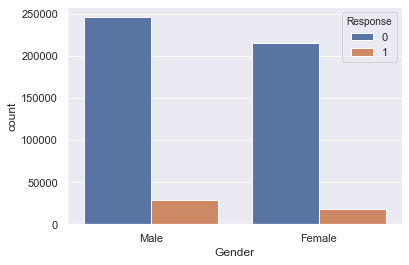

In [54]:
table = pd.crosstab(df["Response"], df["Gender"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="Gender", hue="Response", data=df)

chi-sqr stat:  18161.959732850846 p-value: 0.0


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

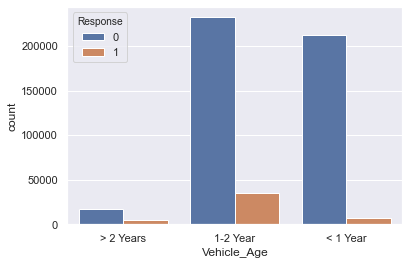

In [55]:
table = pd.crosstab(df["Response"], df["Vehicle_Age"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="Vehicle_Age", hue="Response", data=df)

chi-sqr stat:  46365.079657977374 p-value: 0.0


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

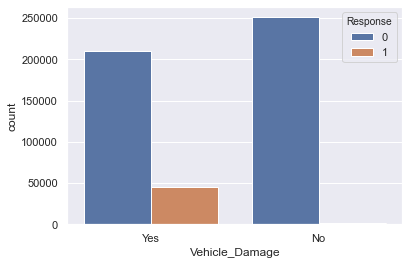

In [56]:
table = pd.crosstab(df["Response"], df["Vehicle_Damage"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="Vehicle_Damage", hue="Response", data=df)

Chi-squared test does not support strong correlation between gender and response

### Outlier analysis - EDA shows that there is no outliers in this dataset

## Create dummy variables for the Vehicle_Age, Vehicle_Damage and Gender

In [65]:
df1 = pd.get_dummies(df, columns=['Vehicle_Age'])
df1 = pd.get_dummies(df1, columns=['Vehicle_Damage'])
# df1 = pd.get_dummies(df1, columns=['Gender'])


Drop id column - no information in the id col

Drop Driving_License column - 1 for all rows

In [66]:
df1 = df1.drop(['id'], axis = 1)
df1 = df1.drop(['Driving_License'], axis = 1)
df1 = df1.drop(['Gender'], axis = 1)
df1 = df1.drop(['Vintage'], axis = 1)
df1 = df1.drop(['Region_Code'], axis = 1)

In [67]:
df1.head(3)

,Age,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,0,40454.0,26.0,1,0,0,1,0,1
1,76,0,33536.0,26.0,0,1,0,0,1,0
2,47,0,38294.0,26.0,1,0,0,1,0,1


# Classification Model construction using machine-learning algorithms

### Decision Tree Classification

In [68]:
X = df1.drop(['Response'], axis = 1)
y = df1[["Response"]]

# Split data; 25% test size from the combined dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.25,random_state=1234, stratify=y)


In [69]:
# Create a model (object) for classification
dtm = DecisionTreeClassifier()
# Build a decision tree
dtm.fit(X_train, y_train)
y_pred = dtm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))


Confusion Matrix 
 [[107768   7591]
 [  9409   2269]]

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93    115359
           1       0.23      0.19      0.21     11678

    accuracy                           0.87    127037
   macro avg       0.57      0.56      0.57    127037
weighted avg       0.86      0.87      0.86    127037



In [70]:
# Create a function for evaluation metrics
def print_result(cm, y_test, y_pred):
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    print ('Accuracy:', accuracy_score(y_test, y_pred))
    print ('F1 score:', f1_score(y_test, y_pred))
    print ('Recall(Specificity):', recall_score(y_test, y_pred))
    print('Sensitivity : ', sensitivity )
    print ('Precision:', precision_score(y_test, y_pred))
    print('RMSE:', math.sqrt(mse))
    print ('AUC:', roc_auc_score(y_test, y_pred))

In [71]:
print_result(cm, y_test, y_pred)

Accuracy: 0.8661807190031251
F1 score: 0.2106973720865447
Recall(Specificity): 0.19429696865901697
Sensitivity :  0.9341967250062847
Precision: 0.23012170385395536
RMSE: 0.36581317772447036
AUC: 0.5642468468326509


In [72]:
# Create a function for roc plotting
def plot_roc(y_test, y_pred, title):
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

    plt.subplots(1, figsize=(4,4))
    plt.title(title, fontsize = 15)
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate', fontsize = 10)
    plt.xlabel('False Positive Rate', fontsize = 10)
    plt.show()
    print ('AUC:', roc_auc_score(y_test, y_pred))

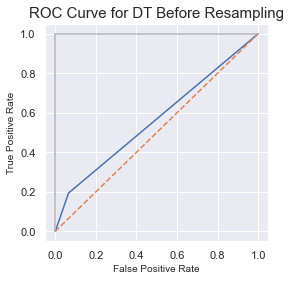

AUC: 0.5642468468326509


In [73]:
plot_roc(y_test, y_pred, 'ROC Curve for DT Before Resampling')

### Naive Bayesian Classification

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.25,random_state=1234, stratify=y)
# Create NB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Build a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89    115359
           1       0.22      0.40      0.29     11678

    accuracy                           0.82    127037
   macro avg       0.58      0.63      0.59    127037
weighted avg       0.87      0.82      0.84    127037



In [75]:
print_result(cm, y_test, y_pred)

Accuracy: 0.8155734156190716
F1 score: 0.28506911598669554
Recall(Specificity): 0.39998287377975683
Sensitivity :  0.8576443970561465
Precision: 0.22144787370217608
RMSE: 0.42944916390759036
AUC: 0.6288136354179517


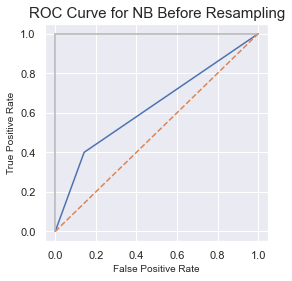

AUC: 0.6288136354179517


In [76]:
plot_roc(y_test, y_pred, 'ROC Curve for NB Before Resampling')

### Random Forest Classification

In [77]:
# Build a random forest classification model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.25,random_state=1234, stratify=y)
rfcm = RandomForestClassifier()
rfcm.fit(X_train, y_train)
y_pred = rfcm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))


C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Confusion Matrix 
 [[108904   6455]
 [  9681   1997]]

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93    115359
           1       0.24      0.17      0.20     11678

    accuracy                           0.87    127037
   macro avg       0.58      0.56      0.56    127037
weighted avg       0.86      0.87      0.86    127037



In [78]:
# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))



Confusion Matrix 
 [[108904   6455]
 [  9681   1997]]

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93    115359
           1       0.24      0.17      0.20     11678

    accuracy                           0.87    127037
   macro avg       0.58      0.56      0.56    127037
weighted avg       0.86      0.87      0.86    127037



In [79]:
print_result(cm, y_test, y_pred)

Accuracy: 0.872981887166731
F1 score: 0.19841033283656231
Recall(Specificity): 0.17100530912827538
Sensitivity :  0.9440442444889432
Precision: 0.23627543776620918
RMSE: 0.3563960056359626
AUC: 0.5575247768086093


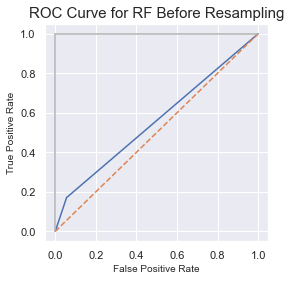

AUC: 0.5575247768086093


In [80]:
plot_roc(y_test, y_pred, 'ROC Curve for RF Before Resampling')

### Neual Network Classification

In [81]:
# Normalize the data
Xn = scale(X)
# Split data
Xn_train, Xn_test = train_test_split(Xn, test_size =.25,random_state=1234, stratify=y)
y_train_1, y_test_1 = train_test_split(y, test_size=.25, random_state=1234, stratify=y)

# Create a model
nnm = MLPClassifier()

nnm = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,activation='logistic')

# Make predictions
nnm.fit(Xn_train, y_train_1)
y_pred_1 = nnm.predict(Xn_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test_1,y_pred_1)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test_1,y_pred_1))

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Confusion Matrix 
 [[115354      5]
 [ 11676      2]]

Classification Report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    115359
           1       0.29      0.00      0.00     11678

    accuracy                           0.91    127037
   macro avg       0.60      0.50      0.48    127037
weighted avg       0.85      0.91      0.86    127037



In [82]:
print_result(cm, y_test_1, y_pred_1)

Accuracy: 0.9080504105103238
F1 score: 0.00034231921266581085
Recall(Specificity): 0.00017126220243192326
Sensitivity :  0.9999566570445305
Precision: 0.2857142857142857
RMSE: 0.303231907110179
AUC: 0.5000639596234812


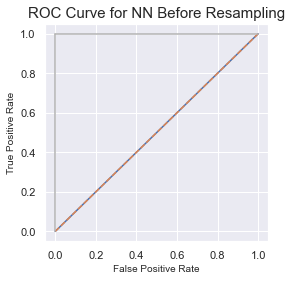

AUC: 0.5000639596234812


In [83]:
plot_roc(y_test_1, y_pred_1, 'ROC Curve for NN Before Resampling')

### Model performance result analysis before resampling
#### 1. Naive Bayesian model gives the highest ROC_AUC score 0.6495
#### 2. Neural Network model performs poorly giving the lowest ROC_AUC score 0.5 (Note: Recall, Precision and F1 scores are 0)

# Resampling - Undersample strategy

### The Dataset is imbalanced (Response 0: 91% vs Response 1: 9%), so I am using resampling method to mitigate the data imbalance problem and to improve the model performance

In [84]:
X = df1.drop(['Response'], axis = 1)
y = df1["Response"]
# define undersample strategy
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =.25,random_state=1234, stratify=y)

rus = RandomUnderSampler(sampling_strategy='majority')
x_train_rus, y_train_rus = rus.fit_sample(x_train, y_train.ravel())

In [85]:
print("Before RUS, counts of label '1': {}".format(sum(y_train==1)))
print("Before RUS, counts of label '0': {} \n".format(sum(y_train==0)))


Before RUS, counts of label '1': 35032
Before RUS, counts of label '0': 346077 



In [86]:
print("After RUS, counts of label '1': {}".format(sum(y_train_rus==1)))
print("After RUS, counts of label '0': {}".format(sum(y_train_rus==0)))

After RUS, counts of label '1': 35032
After RUS, counts of label '0': 35032


### Decision Tree - After Undersampling

In [87]:
# Create instance of Decision Tree Classifier
dtm_rus = DecisionTreeClassifier()


# Fit the instance with training data
dtm_rus.fit(x_train_rus, y_train_rus)

# Predict using the fitted model
y_pred_dt_rus = dtm_rus.predict(x_test)

In [88]:
# Build a confusion matrix and show the Classification Report
cm_dt_rus = metrics.confusion_matrix(y_test,y_pred_dt_rus)
print('\nConfusion Matrix DT RUS','\n',cm_dt_rus)
print('\nClassification Report DECISION TREE RUS','\n',metrics.classification_report(y_test,y_pred_dt_rus))
print('--------------------------------------------------------------------------------')


Confusion Matrix DT RUS 
 [[81024 34335]
 [ 3123  8555]]

Classification Report DECISION TREE RUS 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81    115359
           1       0.20      0.73      0.31     11678

    accuracy                           0.71    127037
   macro avg       0.58      0.72      0.56    127037
weighted avg       0.89      0.71      0.77    127037

--------------------------------------------------------------------------------


In [89]:
print_result(cm_dt_rus, y_test, y_pred_dt_rus)

Accuracy: 0.7051410219070035
F1 score: 0.3135537311244685
Recall(Specificity): 0.7325740709025518
Sensitivity :  0.7023639247913037
Precision: 0.1994637444625787
RMSE: 0.5430091878532043
AUC: 0.7174689978469277


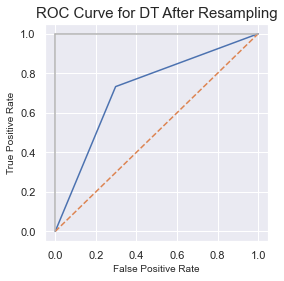

AUC: 0.7174689978469277


In [90]:
plot_roc(y_test, y_pred_dt_rus, 'ROC Curve for DT After Resampling')

### Random Forest After Resampling

In [91]:
# Create a model (object) for classification
rfcm_rus = RandomForestClassifier()

# Build a random forest classification model
rfcm_rus.fit(x_train_rus, y_train_rus)

y_pred_rf_rus = rfcm_rus.predict(x_test)

In [92]:
# Build a confusion matrix and show the Classification Report
cm_rf_rus = metrics.confusion_matrix(y_test,y_pred_rf_rus)
print('\nConfusion Matrix RF RUS','\n',cm_rf_rus)
print('\nClassification Report RF RUS','\n',metrics.classification_report(y_test,y_pred_rf_rus))
print("---------------------------------------------------------------------------------------")



Confusion Matrix RF RUS 
 [[80367 34992]
 [ 2693  8985]]

Classification Report RF RUS 
               precision    recall  f1-score   support

           0       0.97      0.70      0.81    115359
           1       0.20      0.77      0.32     11678

    accuracy                           0.70    127037
   macro avg       0.59      0.73      0.57    127037
weighted avg       0.90      0.70      0.77    127037

---------------------------------------------------------------------------------------


In [93]:
print_result(cm_rf_rus, y_test, y_pred_rf_rus)

Accuracy: 0.7033541409195746
F1 score: 0.322882041146348
Recall(Specificity): 0.7693954444254153
Sensitivity :  0.6966686604426182
Precision: 0.20431134456647793
RMSE: 0.5446520532233633
AUC: 0.7330320524340168


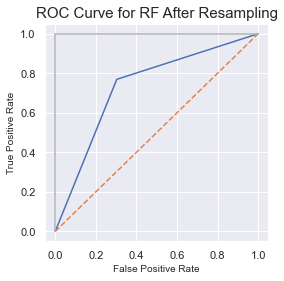

AUC: 0.7330320524340168


In [94]:
plot_roc(y_test, y_pred_rf_rus, 'ROC Curve for RF After Resampling')

### Naive Bayes After Resampling

In [95]:
# Create a model (object) for classification
nb_rus = GaussianNB()

# Build a random forest classification model
nb_rus.fit(x_train_rus, y_train_rus)
y_pred_nb_rus = nb_rus.predict(x_test)


In [96]:
# Build a confusion matrix and show the Classification Report
cm_nb_rus = metrics.confusion_matrix(y_test,y_pred_nb_rus)
print('\nConfusion Matrix NB RUS','\n',cm_nb_rus)
print('\nClassification Report NB RUS','\n',metrics.classification_report(y_test,y_pred_nb_rus))
print("---------------------------------------------------------------------------------------")



Confusion Matrix NB RUS 
 [[74122 41237]
 [ 1178 10500]]

Classification Report NB RUS 
               precision    recall  f1-score   support

           0       0.98      0.64      0.78    115359
           1       0.20      0.90      0.33     11678

    accuracy                           0.67    127037
   macro avg       0.59      0.77      0.55    127037
weighted avg       0.91      0.67      0.74    127037

---------------------------------------------------------------------------------------


In [97]:
print_result(cm_nb_rus, y_test, y_pred_nb_rus)

Accuracy: 0.666120893912797
F1 score: 0.3311519356619096
Recall(Specificity): 0.8991265627675972
Sensitivity :  0.6425333090612783
Precision: 0.2029495332160736
RMSE: 0.5778227289465195
AUC: 0.7708299359144378


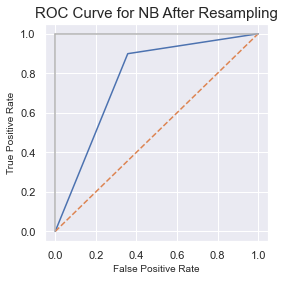

AUC: 0.7708299359144378


In [98]:
plot_roc(y_test, y_pred_nb_rus, 'ROC Curve for NB After Resampling')

### Neural Network After Resampling

In [99]:
# Normalize the data
Xn = scale(X)

In [100]:
# Set the 'stratify' option 'y' to sample 
Xn_train, Xn_test = train_test_split(Xn, test_size =.25,random_state=1234, stratify=y)
y_train, y_test = train_test_split(y, test_size=.25, random_state=1234, stratify=y)

In [101]:
# define undersample strategy
rus = RandomUnderSampler(sampling_strategy='majority')
xn_train_rus, y_train_rus = rus.fit_sample(Xn_train, y_train.ravel())

nnm_rus = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,activation='logistic')
# nnm_smote = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,activation='logistic')

# Make predictions
nnm_rus.fit(xn_train_rus, y_train_rus)
# nnm_smote.fit(xn_train_smote, y_train_smote)

y_pred_nn_rus = nnm_rus.predict(Xn_test)
# y_pred_nn_smote = nnm_smote.predict(Xn_test)

In [102]:
print('\n ** Performance Scores **')
# Build a confusion matrix and show the Classification Report
cm_nn_rus = metrics.confusion_matrix(y_test,y_pred_nn_rus)
print('\nConfusion Matrix','\n',cm_nn_rus)
print('\nClassification Report Neural Network - RUS','\n',metrics.classification_report(y_test,y_pred_nn_rus))

print("---------------------------------------------------------------------------------")


 ** Performance Scores **

Confusion Matrix 
 [[75144 40215]
 [  998 10680]]

Classification Report Neural Network - RUS 
               precision    recall  f1-score   support

           0       0.99      0.65      0.78    115359
           1       0.21      0.91      0.34     11678

    accuracy                           0.68    127037
   macro avg       0.60      0.78      0.56    127037
weighted avg       0.92      0.68      0.74    127037

---------------------------------------------------------------------------------


In [103]:
print_result(cm_nn_rus, y_test, y_pred_nn_rus)

Accuracy: 0.6755827042515172
F1 score: 0.3413612900132645
Recall(Specificity): 0.9145401609864703
Sensitivity :  0.6513926091592334
Precision: 0.20984379605069262
RMSE: 0.5695764178303757
AUC: 0.7829663850728518


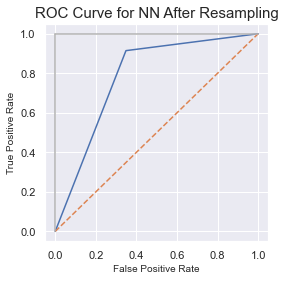

AUC: 0.7829663850728518


In [104]:
plot_roc(y_test, y_pred_nn_rus, 'ROC Curve for NN After Resampling')

### Model performance analysis after resampling

#### 1. Performance greatly improved in all four ML models.
#### 2. Neural Network model performed the best after resampling - 0.7843
#### 3. While sensitivity dropped a certain degree, recall, precision, and AUC greatly increased after resampling

# The final model: The Neural Network after under-resampling with ROC_AUC score 0.7843

[0.06743982 0.02961107 0.75281866 0.04784774 0.00395936 0.01279141
 0.00089054 0.04629903 0.03834237]


<function matplotlib.pyplot.show(close=None, block=None)>

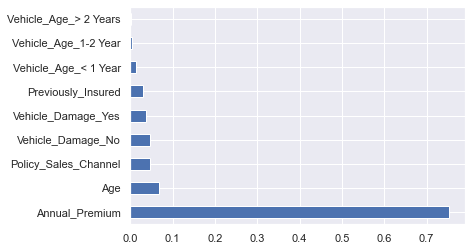

In [105]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show